# Communicate Data Findings - Prosper Loan Data
## by Michael Taverner

## Investigation Overview

The goal of this analysis was to investigate the Prosper Loan Dataset to uncover relationships in the data, specifically where they relate to the retrospecive "risk" of a loan - ie. how certain variables correlated to the Loan Status.


## Dataset Overview

The Prosper Loan Dataset contains nearly 114k records of loan data, with 81 variables per loan. These variables are a mix of date, categorical and numeric datatypes representing different features of each loan, however not all variables were populated for each record. These variables range from identifier keys through to credit ratings (and other types of proprietary Prosper derived ratings), demographic information, predicted outcome metrics and many more. 

The dataset met fairly well the [6 Dimensions of Data Quality](https://towardsdatascience.com/the-six-dimensions-of-data-quality-and-how-to-deal-with-them-bdcf9a3dba71), however as noted above, completeness, while not being met, was only a minor issue, in that not all variables were applicable or necessary for analysis or the serving of the respective loans

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4

import math

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.dpi']= 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CSV/prosperLoanData.csv', parse_dates=['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate'])
df = data.copy()


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

To get an idea of some of the important features in the data, I've plotted Loan Status and Loan Amounts

## Loan Statuses

- As the main variable being investigated, I've plotted the count of loans broken down by status. 

Current and completed are by far the majority classes in this dataset. Chargedoff and Defaulted (essentially failed) loans follow, with the various stages of delinquency and FinalPaymentInProgress representing the remaining minority.

## Loan Amounts

- Loans range from \\$1k to \\$35k and tends towards the lower end of the scale, with regular peaks at each \\$5k interval.

In [ ]:
loan_status = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)',
                 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Defaulted','Chargedoff','Cancelled']
loan_statuses = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status)
df['LoanStatus'] = df['LoanStatus'].astype(loan_statuses)

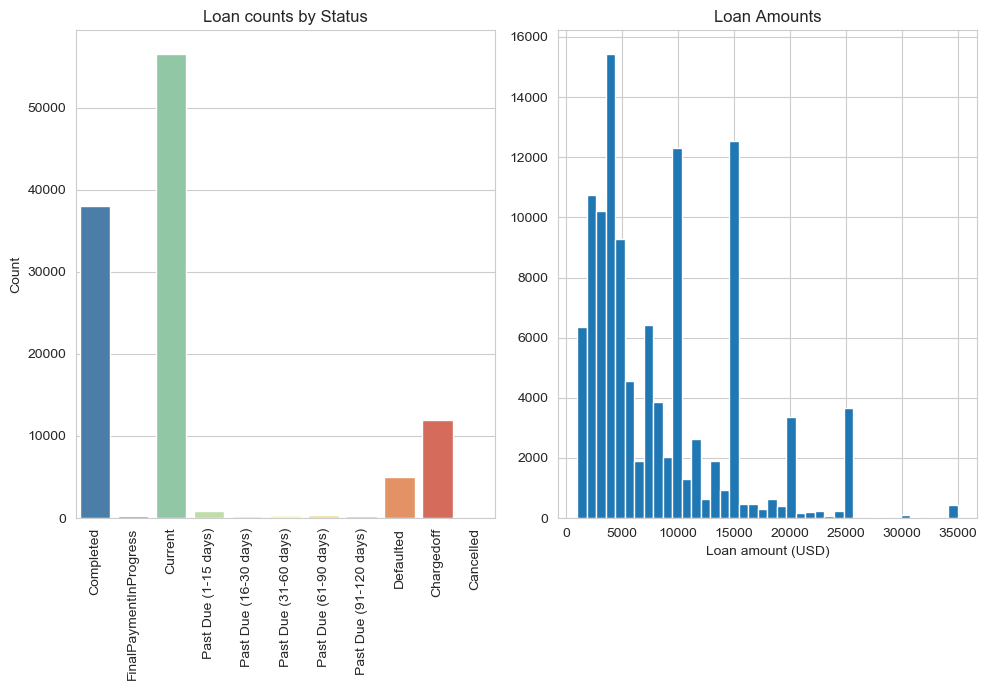

In [22]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'LoanStatus', palette='Spectral_r')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('')
plt.title('Loan counts by Status');

plt.subplot(1,2,2)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = 40)
plt.title('Loan Amounts')
plt.xlabel('Loan amount (USD)')
plt.tight_layout();

## Delinquencies - Last 7 years
Below I've plotted a histogram of all loan records where there was at least one recorded delinquency. I believe past recorded delinquencies will be a strong indicator of whether or not a borrower will default on a loan



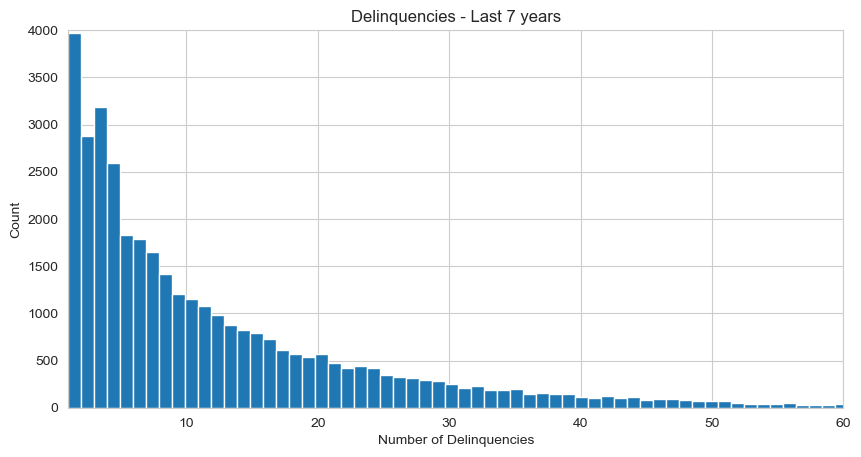

In [25]:
plt.figure(figsize=(10,5))
df.DelinquenciesLast7Years.hist(bins=100)
plt.title('Delinquencies - Last 7 years')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Count')
plt.xlim(1,60)
plt.ylim(0,4000);

## Delinquencies - Last 7 years by Loan Status
When reviewing the distribution of Deliquencies split by Loan Status, we can see that the distribution indicates a higher average amount of delinquencies in the Defaulted and Chargedoff Loan Statuses as well as the various current stages of delinquency. What this shows is that past delinquency is a good measure of risk for loans in this dataset.



In [ ]:
df_nonulls = df.copy()
df_nonulls.dropna(subset = ['DelinquenciesLast7Years','LoanStatus'],inplace=True)

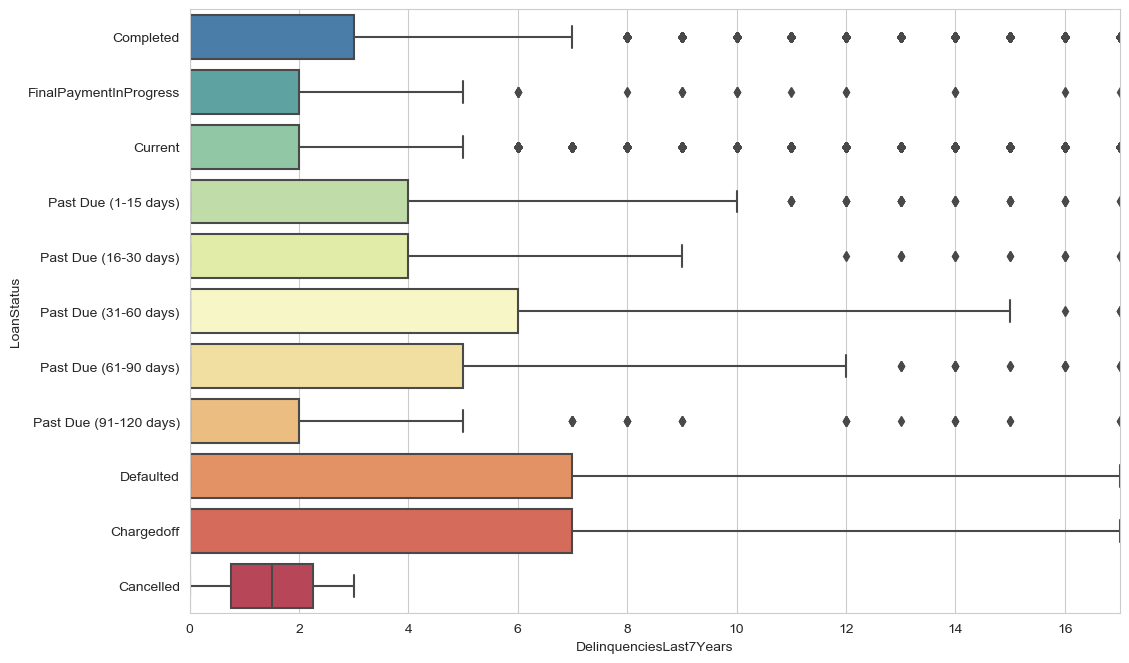

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df_nonulls, x = 'DelinquenciesLast7Years', y = 'LoanStatus',palette='Spectral_r')
plt.xlim(0,17);

## Loan Status vs Credit Score and Loan Amount
Another obvious variable to review when determining risk is the Credit score. I chose to plot the Lower Range of credit score (provided by a Credit rating agency), against the Loan Amount, colored by the status of the loan. 

For illustrative purposes, the loan status starts with a light shade of orange at the "favorable" of the status scale, degrading to a dark purple denoting a less favourable loan status.

By comparing the LoanOriginalAmount and CreditScoreRangeLower we can see that higher value loans are typically only given to borrowers with a higher credit score. The color coding also that the majority of Defaulted and Chargedoff loans fall to the lower end of both the LoanOriginalAmount and Credit Score scales. 

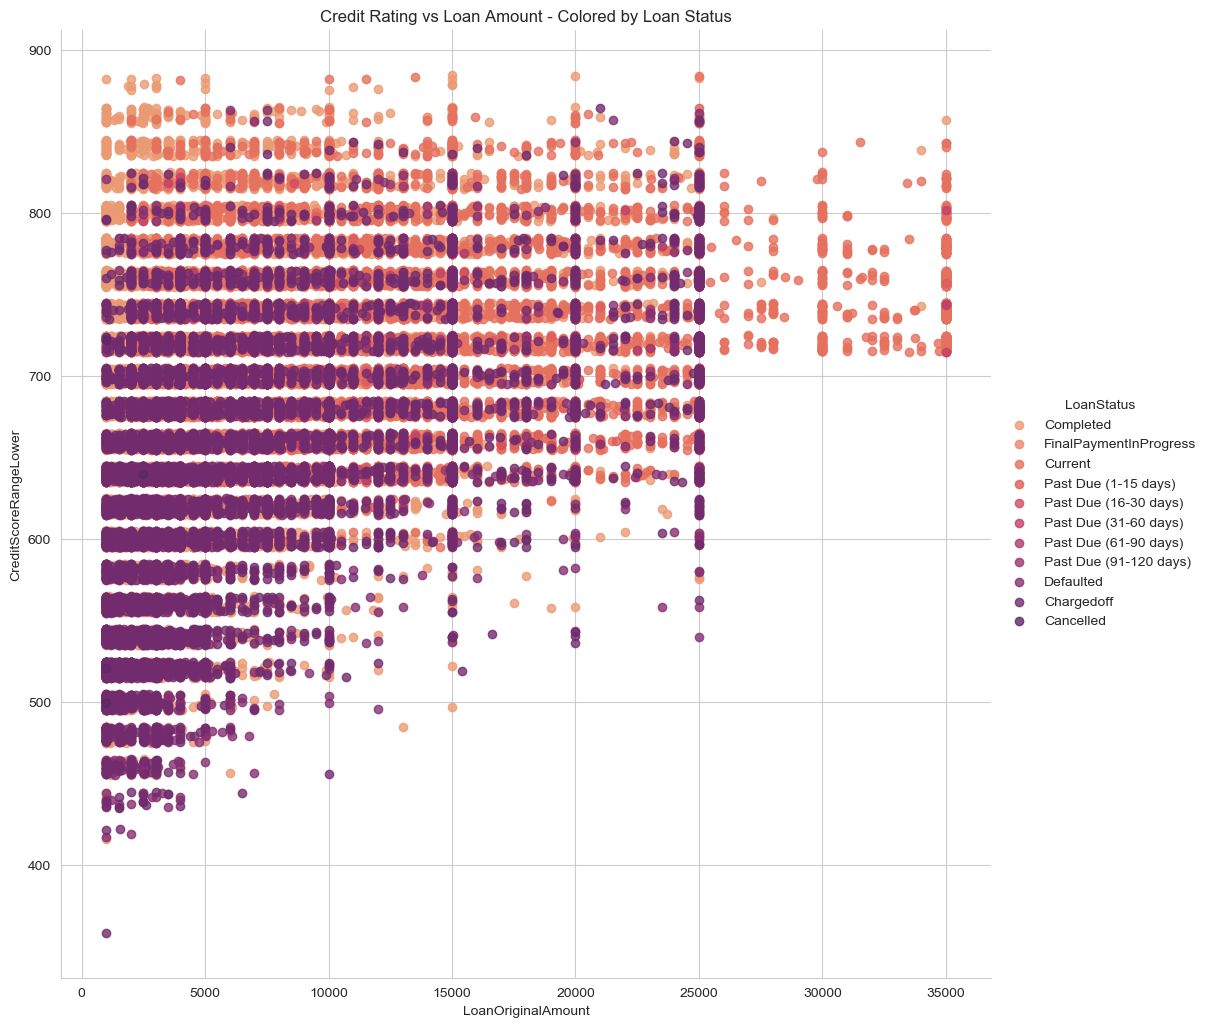

In [31]:
sns.lmplot(data=df.query('CreditScoreRangeLower > 0'), 
           x = 'LoanOriginalAmount', 
           y= 'CreditScoreRangeLower',
           hue='LoanStatus',
           height=10,fit_reg=False,
          y_jitter=5,
          palette='flare')

plt.title('Credit Rating vs Loan Amount - Colored by Loan Status');

## Conclusion

By analyzing a handful of the variables from the 81 variables available, we have discovered a few variables that have been good indicators of the overall risk of a loan - ie. it's risk of an unfavorable outcome. These variables and many more may be used as the basis of future risk analysis or model building.